In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [2]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
CMAP = plt.cm.coolwarm
plt.set_cmap(CMAP)

TEST_SIZE = 0.2
EPOCHS  =2000
ALPHA = 0.01


<Figure size 640x480 with 0 Axes>

In [3]:
X, y = datasets.make_moons(n_samples=1000,
                          noise=0.2,
                          random_state=RANDOM_STATE)

In [4]:
data_df = pd.DataFrame(X, columns=['x1','x2'])
data_df['target'] = y
data_df.head()

,x1,x2,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


<Axes: xlabel='x1', ylabel='x2'>

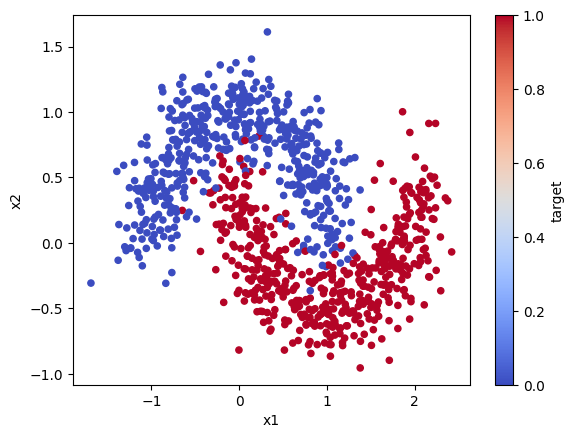

In [5]:
data_df.plot(x='x1', y='x2', kind='scatter', c='target', cmap=CMAP)

In [6]:
data_train, data_test = data_df.values[:900], data_df[900:]
data_train.shape, data_test.shape

((900, 3), (100, 3))

In [31]:
def predict(row, wt):
    z = wt[0]
    for i in range(len(row)-1):
        z += wt[i+1] * row[i]
    return 1 if z>=0 else 0

In [32]:
weights = [0.1, 2.0, 1.0]
predict(data_df.loc[0], weights)

1

In [33]:
data_df.loc[0]
0.1 + 0.90630*2 + 0.902676*1.0

2.815276

In [34]:
def train_weights(train, alpha, n_epoch):
    errors=[]
    weights = np.random.rand(train.shape[1])
    m = train.shape[0]
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            pred = predict(row, weights)
            
            dz = pred - row[-1]
            
            error = (pred - row[-1])**2
            
            sum_error = sum_error + error
            
            weights[0] = weights[0] - alpha * dz/m
            
            for i in range(len(row)-1):
                weights[i+1] -= alpha * dz * row[i]/m
                
        errors.append(sum_error)
            
    return errors, weights

In [35]:
errors, weights = train_weights(data_train,
                               alpha=ALPHA,
                               n_epoch=EPOCHS)
weights

array([ 6.33116246e-07,  2.01733389e-05, -4.70782669e-05])

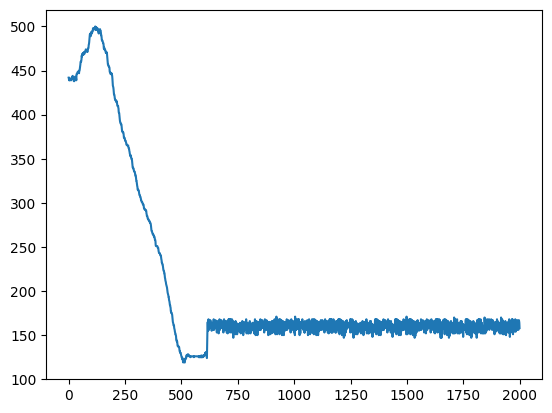

In [36]:
fig, ax = plt.subplots()
ax.plot(errors)

In [43]:
def fn_pred_class(pred):
    1 if pred >= 0.5 else 0

In [13]:
y_pred = []

for row in data_train:
    pred = predict(row, weights)
    y_pred.append(pred)
y_pred
accuracy_score(data_train[:,-1], y_pred)

0.8466666666666667

In [14]:
y_pred = []

for row in data_test.to_numpy():
    pred = predict(row, weights)
    y_pred.append(pred)
y_pred
accuracy_score(data_test.to_numpy()[:,-1], y_pred)

0.89

In [15]:
cm = confusion_matrix(data_test.to_numpy()[:,-1], y_pred)
cm

array([[54,  4],
       [ 7, 35]])

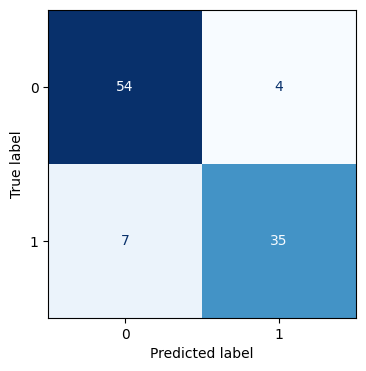

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.show()

In [28]:
x_min, x_max = X[:, 0].min() - 0.01, X[:, 0].max() + 0.01
y_min, y_max = X[:, 1].min() - 0.01, X[:, 1].max() + 0.01
dm = 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                        np.arange(y_min, y_max, dm))

XX = np.c_[xx.ravel(), yy.ravel()]

XX = np.hstack((XX, np.ones((XX.shape[0], 1))))

y_pred = []
for row in (XX):
    y_p = predict(row, weights)
    y_pred.append(y_p)
Z = np.array(y_pred).reshape(xx.shape)

<Axes: xlabel='x1', ylabel='x2'>

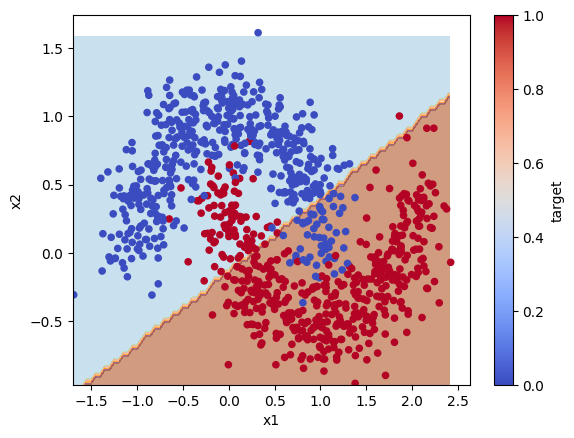

In [29]:
fig, ax = plt.subplots()

ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
data_df.plot(x='x1', y='x2', kind='scatter', ax=ax, c='target', cmap=CMAP)

In [51]:
def fn_sigmoid(z):
    return 1/(1+np.exp(-z))

In [52]:
def predict(row, wt):
    z = wt[0]
    for i in range(len(row)-1):
        z += wt[i+1] * row[i]
    a = fn_sigmoid(z)
    return a

In [53]:
def train_weights(train, alpha, n_epoch):
    errors=[]
    weights = np.random.rand(train.shape[1])
    m = train.shape[0]
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            pred = predict(row, weights)
            
            dz = pred - row[-1]
            
            error = -row[-1]*np.log(pred)
            
            sum_error = sum_error + error
            
            weights[0] = weights[0] - alpha * dz/m
            
            for i in range(len(row)-1):
                weights[i+1] = weights[i+1] - alpha * dz * row[i]/m
                
        errors.append(sum_error)
            
    return errors, weights

In [55]:
# y_pred = []

# for row in data_train:
#     pred = predict(row, weights)
#     y_pred.append(fn_pred_class(pred))
# y_pred
# accuracy_score(data_test.to_numpy()[:,-1], y_pred)

In [ ]:
x_min, x_max = X[:, 0].min() - 0.01, X[:, 0].max() + 0.01
y_min, y_max = X[:, 1].min() - 0.01, X[:, 1].max() + 0.01
dm = 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                        np.arange(y_min, y_max, dm))

XX = np.c_[xx.ravel(), yy.ravel()]

XX = np.hstack((XX, np.ones((XX.shape[0], 1))))

y_pred = []
for row in (XX):
    y_p = predict(row, weights)
    y_pred.append(y_p)
Z = np.array(y_pred).reshape(xx.shape)